In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import flopy

In [2]:
# load the base model
bws = os.path.join('..', 'base')
m = flopy.modflow.Modflow.load('m.nam', version='mf2005', model_ws=bws, check=False)

In [3]:
# get list of active cells
ib = m.bas6.ibound.array

In [4]:
fpth = os.path.join(bws, 'm.hds')
hobj = flopy.utils.HeadFile(fpth)
hcal = hobj.get_data(totim=2.)

In [5]:
# get list of calibration head files
dpth = os.path.join('..', 'predictive-heads')
predh_files = [os.path.join(dpth, fn) for fn in sorted(os.listdir(dpth)) if '.hds' in fn]

In [6]:
predh_files

['../predictive-heads/GroupA_ex05_prediction.hds',
 '../predictive-heads/GroupB_Ex05_prediction.hds',
 '../predictive-heads/GroupC_Ex05_prediction.hds',
 '../predictive-heads/GroupD_ex05.hds',
 '../predictive-heads/GroupE_EX05.hds',
 '../predictive-heads/GroupF_ex05_prediction.hds',
 '../predictive-heads/GroupG_freyberg.hds']

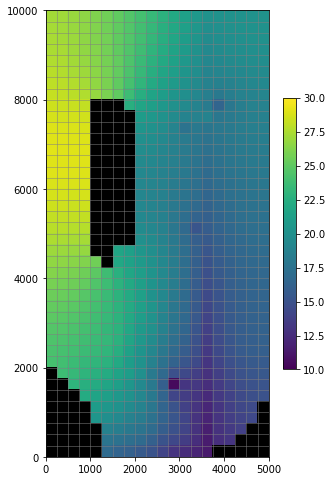

In [7]:
mm = flopy.plot.ModelMap(model=m)
fig = mm.ax.get_figure()
fig.set_figheight(10)
fig.set_figwidth(5)

v = mm.plot_array(hcal, masked_values=[999.0], vmin=10, vmax=30)

mm.plot_grid(lw=0.5)
mm.plot_ibound()

plt.colorbar(v, shrink=0.5);


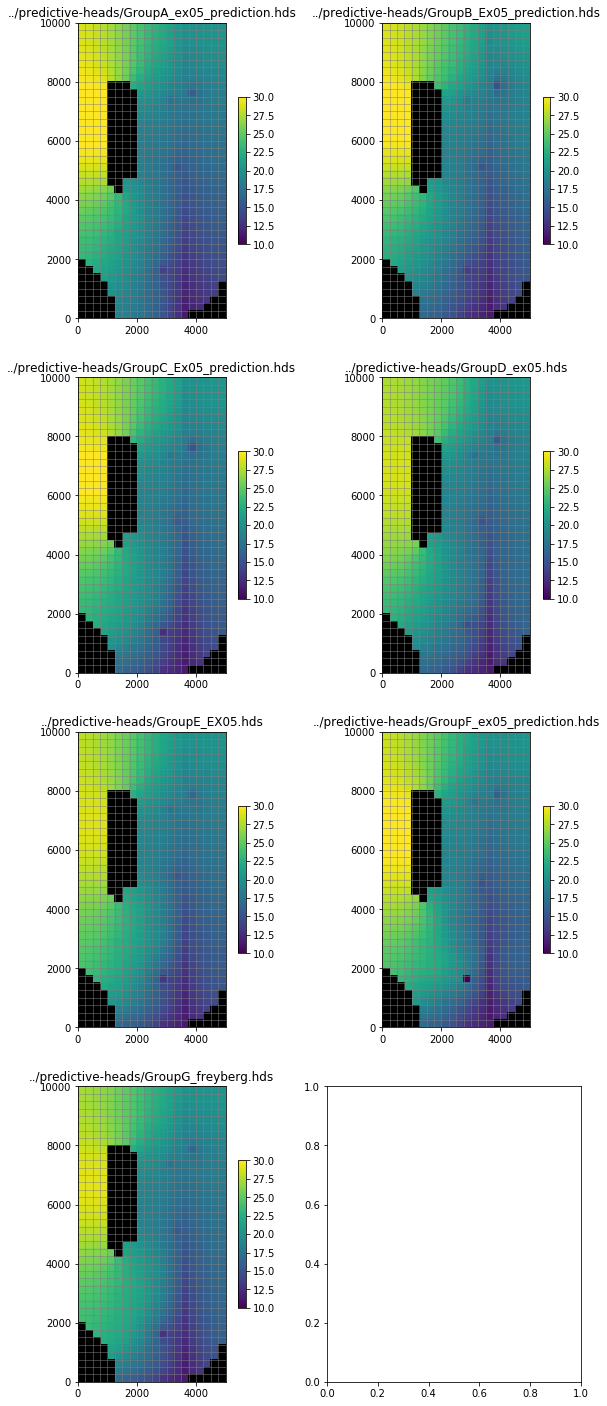

In [8]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(10, 25))
axes = axes.flatten()

for idx, fpth in enumerate(predh_files):
    hobj = flopy.utils.HeadFile(fpth)
    h = hobj.get_data()
    ax = axes[idx]
    ax.set_aspect('equal')
    ax.set_title(fpth)
    mm = flopy.plot.ModelMap(model=m, ax=ax)
    v = mm.plot_array(h, masked_values=[999.0], vmin=10, vmax=30)
    mm.plot_grid(lw=0.5)
    mm.plot_ibound()
    plt.colorbar(v, shrink=0.5, ax=ax);

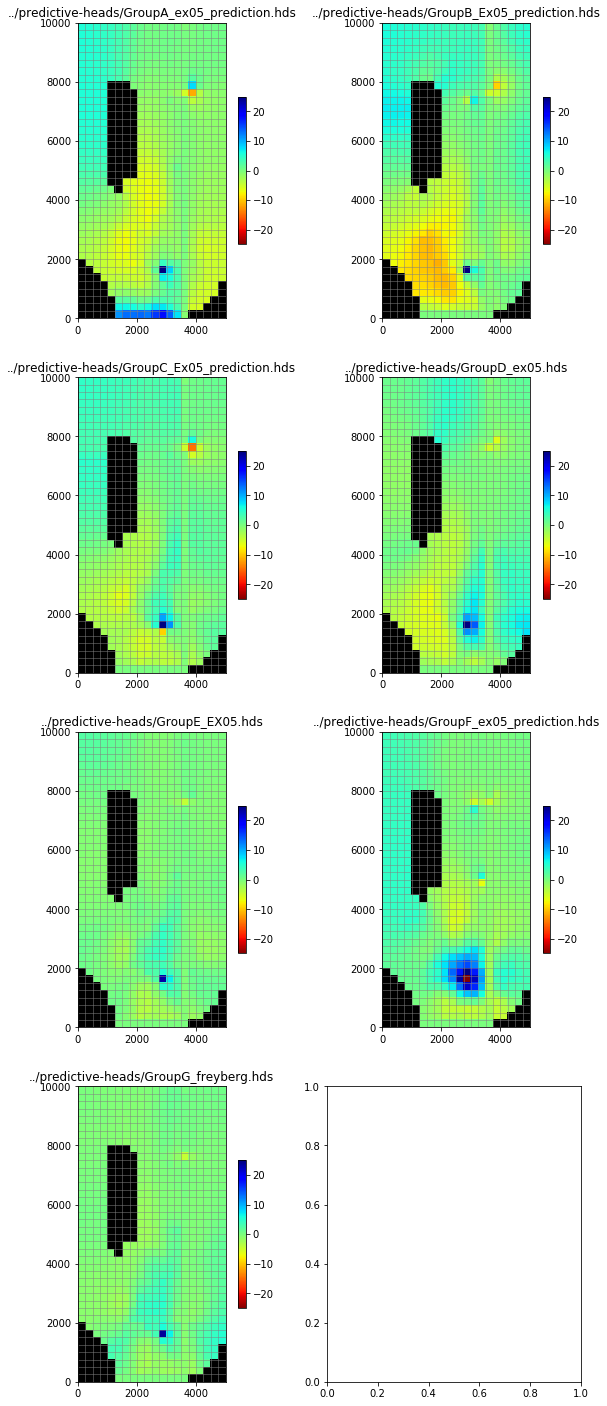

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(10, 25))
axes = axes.flatten()

for idx, fpth in enumerate(predh_files):
    hobj = flopy.utils.HeadFile(fpth)
    h = hobj.get_data()
    ax = axes[idx]
    ax.set_aspect('equal')
    ax.set_title(fpth)
    pd = 100. * (h - hcal) / hcal
    pd[ib <= 0] = 0
    mm = flopy.plot.ModelMap(model=m, ax=ax)
    v = mm.plot_array(pd, cmap='jet_r', vmin=-25, vmax=25)
    mm.plot_grid(lw=0.5)
    mm.plot_ibound()
    plt.colorbar(v, shrink=0.5, ax=ax);